In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt



In [2]:
train = pd.read_csv('GSE88794_series_matrix.csv')
train

,Unnamed: 0,7892501,7892502,7892503,7892504,7892505,7892506,7892507,7892508,7892509,...,8180410,8180411,8180412,8180413,8180414,8180415,8180416,8180417,8180418,Condition
0,GSM2346493,6.141499,6.344813,2.124038,8.044588,1.600492,5.807949,2.306868,6.649796,9.199948,...,9.600732,9.406928,6.619782,6.432944,4.881565,6.788753,3.886198,7.413335,7.830407,CR
1,GSM2346494,6.800007,6.141062,3.313955,7.806962,1.876414,5.773803,3.828433,6.728922,9.298348,...,9.532520,9.641127,6.725681,6.415533,4.955827,6.757139,3.706079,7.570259,8.083369,Control
2,GSM2346495,6.308996,6.088856,2.481684,7.839041,2.396581,5.661877,4.164072,6.799315,9.371203,...,9.601104,9.378748,6.924114,6.615555,4.805453,6.904153,4.065162,7.612507,7.872705,CR
3,GSM2346496,6.673761,6.770832,2.785560,8.113244,1.858400,6.077759,3.942237,7.119359,9.349193,...,9.678284,9.260319,6.870218,6.678141,3.941864,7.065730,3.143378,7.901069,7.844148,CR
4,GSM2346497,6.740859,5.759540,2.705488,7.615558,1.458577,6.264780,4.772632,7.250661,9.367160,...,9.768493,9.423137,7.001876,6.724694,5.181383,7.037937,4.615021,7.765779,7.792478,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,GSM2347719,7.467481,6.854143,4.003833,8.434621,1.712031,5.699789,3.588451,7.143595,9.915778,...,9.638349,9.467302,6.829725,6.532078,5.315258,6.826044,4.265547,7.562232,8.042471,Control
1227,GSM2347720,7.279687,5.481890,2.565783,7.833179,2.055316,5.917488,4.099515,7.138708,9.241966,...,9.696665,9.429148,6.616552,6.312201,4.568249,6.892388,4.290261,7.704130,8.005980,CR
1228,GSM2347721,7.332799,6.407654,2.405874,8.240841,1.489426,6.351996,4.464902,7.135329,9.239262,...,9.665262,9.652237,6.915941,6.582845,4.961412,6.767296,4.629200,7.561707,7.805594,Control
1229,GSM2347722,7.910465,6.801688,2.012238,8.249532,2.205410,6.468284,4.355310,7.101432,9.514902,...,9.633094,9.449601,6.729535,6.434742,5.126172,6.997897,4.473147,7.744576,8.265906,CR


In [3]:
train.iloc[:,0:10].describe()

,7892501,7892502,7892503,7892504,7892505,7892506,7892507,7892508,7892509
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000
mean,6.832628,6.129719,2.730593,8.066871,1.795824,6.105414,3.789419,6.963388,9.441935
std,0.442647,0.447644,0.627307,0.274882,0.374871,0.428308,0.631538,0.380656,0.209247
min,4.885669,3.370623,1.298233,6.963690,1.087209,4.371337,1.844130,3.496252,8.498699
25%,6.543243,5.868355,2.268137,7.881538,1.528924,5.831994,3.350528,6.784315,9.313285
50%,6.850997,6.167566,2.655120,8.077849,1.709942,6.134400,3.834970,7.005457,9.445643
75%,7.108501,6.434135,3.120215,8.254633,1.985450,6.388106,4.250879,7.212813,9.581891
max,8.336246,7.235683,5.070085,8.916926,3.516598,7.301338,5.551478,7.978936,10.194544


# Class distribution + Handling Imbalanced Classes

<Axes: xlabel='Condition'>

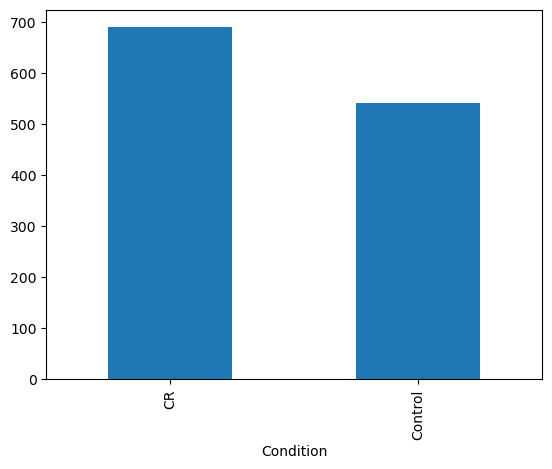

In [4]:
train['Condition'].value_counts().plot.bar()

# Identify Missing Values with : isnull + sum



In [5]:
train.info()
train.isnull().sum()
# train.isnull().sum().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Columns: 33299 entries, Unnamed: 0 to Condition
dtypes: float64(33297), object(2)
memory usage: 312.7+ MB


Unnamed: 0    0
7892501       0
7892502       0
7892503       0
7892504       0
             ..
8180415       0
8180416       0
8180417       0
8180418       0
Condition     0
Length: 33299, dtype: int64

# Divide Data into X and y


In [6]:
y = train['Condition']
X = train.drop(['Condition','Unnamed: 0'], axis = 1)
X.head()

,7892501,7892502,7892503,7892504,7892505,7892506,7892507,7892508,7892509,7892510,...,8180409,8180410,8180411,8180412,8180413,8180414,8180415,8180416,8180417,8180418
0,6.141499,6.344813,2.124038,8.044588,1.600492,5.807949,2.306868,6.649796,9.199948,4.968615,...,10.476925,9.600732,9.406928,6.619782,6.432944,4.881565,6.788753,3.886198,7.413335,7.830407
1,6.800007,6.141062,3.313955,7.806962,1.876414,5.773803,3.828433,6.728922,9.298348,5.303777,...,10.359343,9.532520,9.641127,6.725681,6.415533,4.955827,6.757139,3.706079,7.570259,8.083369
2,6.308996,6.088856,2.481684,7.839041,2.396581,5.661877,4.164072,6.799315,9.371203,4.902416,...,10.596962,9.601104,9.378748,6.924114,6.615555,4.805453,6.904153,4.065162,7.612507,7.872705
3,6.673761,6.770832,2.785560,8.113244,1.858400,6.077759,3.942237,7.119359,9.349193,5.030697,...,10.607275,9.678284,9.260319,6.870218,6.678141,3.941864,7.065730,3.143378,7.901069,7.844148
4,6.740859,5.759540,2.705488,7.615558,1.458577,6.264780,4.772632,7.250661,9.367160,4.847706,...,10.808388,9.768493,9.423137,7.001876,6.724694,5.181383,7.037937,4.615021,7.765779,7.792478


# feature scaling

In [7]:
min_values = np.min(X, axis=0)
max_values = np.max(X, axis=0)
print('min values')
print(min_values)
print('max values')
print(max_values)

min values
7892501    4.885669
7892502    3.370623
7892503    1.298233
7892504    6.963690
7892505    1.087209
             ...   
8180414    3.814399
8180415    5.493119
8180416    2.841394
8180417    7.146939
8180418    7.134709
Length: 33297, dtype: float64
max values
7892501    8.336246
7892502    7.235683
7892503    5.070085
7892504    8.916926
7892505    3.516598
             ...   
8180414    6.409275
8180415    7.354994
8180416    5.068912
8180417    8.252189
8180418    9.189155
Length: 33297, dtype: float64


## Identify Categorical Features


In [8]:
categorical_features = train.select_dtypes(include = ['object']).columns.values
categorical_features

array(['Unnamed: 0', 'Condition'], dtype=object)

## Identify Numerical Features


In [9]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns.values
numerical_features

array(['7892501', '7892502', '7892503', ..., '8180416', '8180417',
       '8180418'], dtype=object)

# Identify Missing Values with : percentage of missing values



In [10]:
missing_values_proportion = train.isnull().sum() / len(train)
threshold = 0.3

# Filter columns with more than 30% missing values
columns_with_more_than_30_percent_missing = missing_values_proportion[missing_values_proportion >= threshold]

print("Features with more than 30% missing values:")
print(columns_with_more_than_30_percent_missing)

# Filter columns with missing values between 10% and 30%
condition = (missing_values_proportion > 0) & (missing_values_proportion <= 0.3)
columns_with_missing_values_between_10_and_30_percent = missing_values_proportion[condition].index

# Print the columns with missing values between 10% and 30%
print("features with missing values between 10% and 30%:")
print(columns_with_missing_values_between_10_and_30_percent)


Features with more than 30% missing values:
Series([], dtype: float64)
features with missing values between 10% and 30%:
Index([], dtype='object')


# Eliminate Features with > 30% Missing Values

In [11]:
# Drop columns with more than 30% missing values
train = train.drop(columns=columns_with_more_than_30_percent_missing.index)

# Impute Missing Values ( Numerical Features)



# KNN imputation less than 30%

If you didn’t specify ‘k’, the KNNImputer defaults to using 5 nearest neighbors

In [12]:
numerical_columns_with_less_than_30_percent_missing = missing_values_proportion[(missing_values_proportion < threshold) & X[numerical_features].isnull().any()].index

if len(numerical_columns_with_less_than_30_percent_missing) > 0:
    num_imputer = KNNImputer()
    X[numerical_columns_with_less_than_30_percent_missing] = num_imputer.fit_transform(X[numerical_columns_with_less_than_30_percent_missing])


# Check

In [13]:
X.isnull().sum()

7892501    0
7892502    0
7892503    0
7892504    0
7892505    0
          ..
8180414    0
8180415    0
8180416    0
8180417    0
8180418    0
Length: 33297, dtype: int64

In [14]:
# Concatenate 'SampleID', y (target variable), and the imputed X DataFrame
imputed_train = pd.concat([train['Unnamed: 0'], y, X], axis=1)
print(imputed_train.head())


   Unnamed: 0 Condition   7892501   7892502   7892503   7892504   7892505  \
0  GSM2346493        CR  6.141499  6.344813  2.124038  8.044588  1.600492   
1  GSM2346494   Control  6.800007  6.141062  3.313955  7.806962  1.876414   
2  GSM2346495        CR  6.308996  6.088856  2.481684  7.839041  2.396581   
3  GSM2346496        CR  6.673761  6.770832  2.785560  8.113244  1.858400   
4  GSM2346497   Control  6.740859  5.759540  2.705488  7.615558  1.458577   

    7892506   7892507   7892508  ...    8180409   8180410   8180411   8180412  \
0  5.807949  2.306868  6.649796  ...  10.476925  9.600732  9.406928  6.619782   
1  5.773803  3.828433  6.728922  ...  10.359343  9.532520  9.641127  6.725681   
2  5.661877  4.164072  6.799315  ...  10.596962  9.601104  9.378748  6.924114   
3  6.077759  3.942237  7.119359  ...  10.607275  9.678284  9.260319  6.870218   
4  6.264780  4.772632  7.250661  ...  10.808388  9.768493  9.423137  7.001876   

    8180413   8180414   8180415   8180416   818041

# Export Imputed Features


In [15]:
imputed_train.to_csv('GSE88794_series_matrix.csv_imputed.csv')

# Apply log transformation to numerical features

In [16]:
# Find features with negative or zero values
neg_zero_features = imputed_train[numerical_features].columns[(imputed_train[numerical_features] <= 0).any()]
print(neg_zero_features)

# Shift negative or zero values to ensure all values are positive
imputed_train[neg_zero_features] += abs(imputed_train[neg_zero_features].min()) + 1

# Apply log transformation to numerical features
imputed_train[numerical_features] = np.log1p(imputed_train[numerical_features])

# Display the head of the imputed_train DataFrame after log transformation
print(imputed_train.head())


Index([], dtype='object')
   Unnamed: 0 Condition   7892501   7892502   7892503   7892504   7892505  \
0  GSM2346493        CR  1.965923  1.993994  1.139126  2.202167  0.955701   
1  GSM2346494   Control  2.054125  1.965861  1.461855  2.175543  1.056544   
2  GSM2346495        CR  1.989106  1.958524  1.247516  2.179178  1.222769   
3  GSM2346496        CR  2.037807  2.050377  1.331194  2.209729  1.050262   
4  GSM2346497   Control  2.046513  1.910955  1.309815  2.153570  0.899583   

    7892506   7892507   7892508  ...   8180409   8180410   8180411   8180412  \
0  1.918091  1.196002  2.034679  ...  2.440338  2.360923  2.342472  2.030748   
1  1.913063  1.574522  2.044969  ...  2.430041  2.354468  2.364726  2.044550   
2  1.896401  1.641725  2.054036  ...  2.450743  2.360958  2.339760  2.069910   
3  1.956957  1.597818  2.094251  ...  2.451632  2.368212  2.328284  2.063086   
4  1.983038  1.753128  2.110293  ...  2.468810  2.376625  2.344028  2.079676   

    8180413   8180414   818041

# New range after LOG

In [17]:
min_values_log = imputed_train[numerical_features].min()
max_values_log = imputed_train[numerical_features].max()

print('Min values after log transformation:')
print(min_values_log)
print('\nMax values after log transformation:')
print(max_values_log)



Min values after log transformation:
7892501    1.772520
7892502    1.474906
7892503    0.832140
7892504    2.074892
7892505    0.735828
             ...   
8180414    1.571611
8180415    1.870743
8180416    1.345835
8180417    2.097642
8180418    2.096140
Length: 33297, dtype: float64

Max values after log transformation:
7892501    2.233904
7892502    2.108476
7892503    1.803373
7892504    2.294243
7892505    1.507759
             ...   
8180414    2.002733
8180415    2.122859
8180416    1.803179
8180417    2.224860
8180418    2.321324
Length: 33297, dtype: float64


# For few features

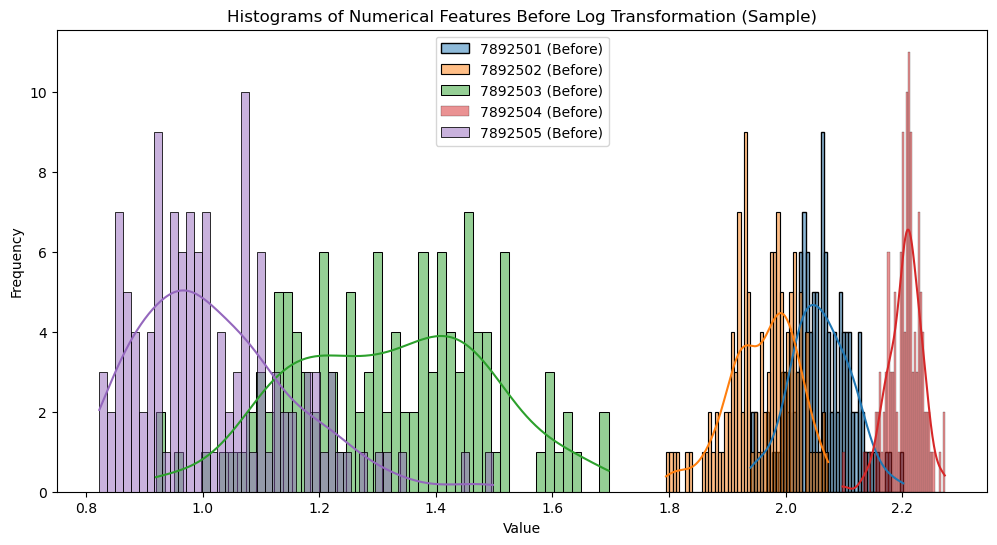

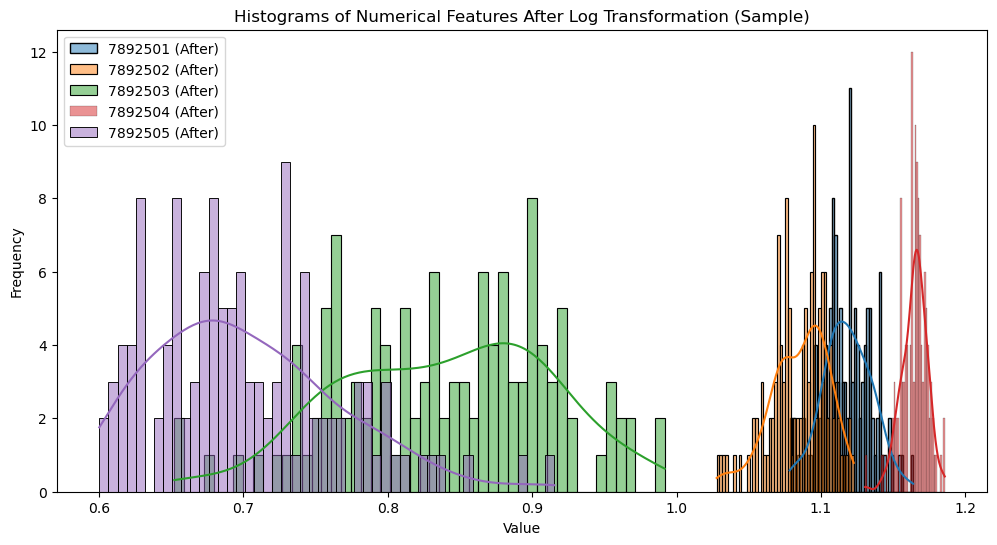

Summary Statistics Before Log Transformation:
          7892501     7892502     7892503     7892504     7892505
count  123.000000  123.000000  123.000000  123.000000  123.000000
mean     2.059115    1.959871    1.320434    2.204674    1.020940
std      0.051982    0.059099    0.169294    0.028451    0.132735
min      1.939791    1.794810    0.919749    2.097503    0.822496
25%      2.026792    1.921171    1.188877    2.187032    0.923188
50%      2.062257    1.972701    1.329153    2.208425    0.996935
75%      2.095848    2.003606    1.452250    2.222039    1.093750
max      2.201974    2.073002    1.696128    2.272999    1.497780

Summary Statistics After Log Transformation:
          7892501     7892502     7892503     7892504     7892505
count  123.000000  123.000000  123.000000  123.000000  123.000000
mean     1.117983    1.084946    0.839091    1.164571    0.701494
std      0.016991    0.020085    0.073465    0.008900    0.064083
min      1.078339    1.027764    0.652195    1.130

In [18]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)

with pd.option_context('mode.use_inf_as_na', True):
    # Import seaborn and use it here
    import seaborn as sns
# Select a subset of numerical features and a sample of the data
sample_numerical_features = numerical_features[:5]
sample_data = imputed_train.sample(frac=0.1, random_state=42)

# Plot histograms of numerical features before log transformation
plt.figure(figsize=(12, 6))
for feature in sample_numerical_features:
    sns.histplot(sample_data[feature], bins=50, alpha=0.5, label=feature + " (Before)", kde=True)
plt.title("Histograms of Numerical Features Before Log Transformation (Sample)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot histograms of numerical features after log transformation
plt.figure(figsize=(12, 6))
for feature in sample_numerical_features:
    sns.histplot(np.log1p(sample_data[feature]), bins=50, alpha=0.5, label=feature + " (After)", kde=True)
plt.title("Histograms of Numerical Features After Log Transformation (Sample)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Print summary statistics for each numerical feature
print("Summary Statistics Before Log Transformation:")
print(sample_data[sample_numerical_features].describe())
print("\nSummary Statistics After Log Transformation:")
print(np.log1p(sample_data[sample_numerical_features]).describe())


# another aproach to hundle pos and neg and 0 values  with log

In [19]:
# Find the minimum value across numerical features
min_value = imputed_train[numerical_features].min().min()

# If the minimum value is negative, add its absolute value plus 1 to all values
if min_value < 0:
    offset = np.abs(min_value) + 1
    imputed_train[numerical_features] += offset

imputed_train[numerical_features] = np.log1p(imputed_train[numerical_features])

print(imputed_train.head())


   Unnamed: 0 Condition   7892501   7892502   7892503   7892504   7892505  \
0  GSM2346493        CR  1.087188  1.096608  0.760397  1.163828  0.670749   
1  GSM2346494   Control  1.116493  1.087168  0.900915  1.155479  0.721027   
2  GSM2346495        CR  1.094974  1.084690  0.809826  1.156623  0.798754   
3  GSM2346496        CR  1.111136  1.115265  0.846381  1.166186  0.717968   
4  GSM2346497   Control  1.113998  1.068481  0.837167  1.148535  0.641634   

    7892506   7892507   7892508  ...   8180409   8180410   8180411   8180412  \
0  1.070930  0.786638  1.110106  ...  1.235570  1.212216  1.206711  1.108809   
1  1.069205  0.945664  1.113491  ...  1.232572  1.210293  1.213347  1.113353   
2  1.063469  0.971432  1.116464  ...  1.238590  1.212226  1.205899  1.121648   
3  1.084161  0.954672  1.129546  ...  1.238847  1.214382  1.202457  1.119423   
4  1.092942  1.012738  1.134717  ...  1.243812  1.216877  1.207176  1.124824   

    8180413   8180414   8180415   8180416   8180417   81

# Check if any new missing values were generated after log

In [20]:
missing_values_after = imputed_train.isnull().sum()

if (missing_values_after > 0).any():
    print("New missing values were generated after the log transformation:")
    print(missing_values_after[missing_values_after > 0])
else:
    print("No new missing values were generated after the log transformation.")


No new missing values were generated after the log transformation.


# Outliers before applying yeojohnson transformation

In [21]:

numerical_columns = imputed_train.select_dtypes(include=['int64', 'float64']).columns


outliers_info = {}

for col in numerical_columns:
    z_scores = zscore(imputed_train[col])
    outliers_mask = (z_scores > threshold) | (z_scores < -threshold)
    if outliers_mask.any():
        outliers_info[col] = outliers_mask.sum()

print("Columns with outliers:")
for col, count in outliers_info.items():
    print(f"Column '{col}' has {count} outliers.")
 
    num_columns_with_outliers = len(outliers_info)
print("Number of columns with outliers:", num_columns_with_outliers)

Columns with outliers:
Column '7892501' has 920 outliers.
Column '7892502' has 924 outliers.
Column '7892503' has 957 outliers.
Column '7892504' has 924 outliers.
Column '7892505' has 946 outliers.
Column '7892506' has 950 outliers.
Column '7892507' has 958 outliers.
Column '7892508' has 869 outliers.
Column '7892509' has 939 outliers.
Column '7892510' has 925 outliers.
Column '7892511' has 904 outliers.
Column '7892512' has 937 outliers.
Column '7892513' has 943 outliers.
Column '7892514' has 951 outliers.
Column '7892515' has 903 outliers.
Column '7892516' has 945 outliers.
Column '7892517' has 901 outliers.
Column '7892518' has 978 outliers.
Column '7892519' has 922 outliers.
Column '7892520' has 925 outliers.
Column '7892521' has 935 outliers.
Column '7892522' has 948 outliers.
Column '7892524' has 885 outliers.
Column '7892525' has 907 outliers.
Column '7892526' has 921 outliers.
Column '7892527' has 851 outliers.
Column '7892528' has 909 outliers.
Column '7892529' has 913 outlier

# apply yeojohnson transformation for hundle outliers 

In [26]:
from scipy.optimize import minimize_scalar

# Define the Yeo-Johnson transformation function
def yeojohnson_transform(x, lmbda):
    if lmbda == 0:
        return np.log1p(x)
    else:
        return np.where(x >= 0, (x ** lmbda - 1) / lmbda, -((-x) ** lmbda - 1) / lmbda)

# Define the negative log-likelihood function for Yeo-Johnson transformation
def neg_llf(lmbda, data):
    y = yeojohnson_transform(data, lmbda)
    llf = _yeojohnson_llf(lmbda, data)  # You need to implement this function
    if llf is None:
        return float('inf')  # Return a large value to indicate failure
    return -llf

# Define the negative log-likelihood function specific to Yeo-Johnson
def _yeojohnson_llf(lmbda, data):
    # Implement the log-likelihood function based on your specific requirements
    pass

# Apply the Yeo-Johnson transformation to numerical features
for col in numerical_features:
    # Optimize lambda parameter using a custom initial point
    res = minimize_scalar(neg_llf, args=(imputed_train[col],), method='bounded', bounds=(-2, 2))
    lmbda = res.x
    transformed_data = yeojohnson_transform(imputed_train[col], lmbda)
    imputed_train[col] = transformed_data


# check if there is still outliers

In [27]:

numerical_columns = imputed_train.select_dtypes(include=['int64', 'float64']).columns


outliers_info = {}

for col in numerical_columns:
    z_scores = zscore(imputed_train[col])
    outliers_mask = (z_scores > threshold) | (z_scores < -threshold)
    if outliers_mask.any():
        outliers_info[col] = outliers_mask.sum()

print("Columns with outliers:")
for col, count in outliers_info.items():
    print(f"Column '{col}' has {count} outliers.")
    
    
    
    
    
    num_columns_with_outliers = len(outliers_info)
print("Number of columns with outliers:", num_columns_with_outliers)

Columns with outliers:
Column '7892501' has 914 outliers.
Column '7892502' has 5 outliers.
Column '7892503' has 11 outliers.
Column '7892504' has 922 outliers.
Column '7892505' has 955 outliers.
Column '7892506' has 2 outliers.
Column '7892507' has 938 outliers.
Column '7892508' has 2 outliers.
Column '7892509' has 947 outliers.
Column '7892510' has 1231 outliers.
Column '7892511' has 54 outliers.
Column '7892512' has 86 outliers.
Column '7892513' has 61 outliers.
Column '7892514' has 955 outliers.
Column '7892515' has 903 outliers.
Column '7892516' has 1231 outliers.
Column '7892517' has 42 outliers.
Column '7892518' has 506 outliers.
Column '7892519' has 1231 outliers.
Column '7892520' has 929 outliers.
Column '7892521' has 945 outliers.
Column '7892522' has 963 outliers.
Column '7892524' has 20 outliers.
Column '7892525' has 9 outliers.
Column '7892526' has 1225 outliers.
Column '7892527' has 12 outliers.
Column '7892528' has 930 outliers.
Column '7892529' has 1231 outliers.
Column 

# imputation after transformation 

In [28]:
# Perform imputation on the transformed data
imputer = KNNImputer()

missing_values = imputed_train[numerical_features].isnull().sum()
if missing_values.sum() > 0:
    print("New missing values were generated after the Yeo-Johnson transformation.")

    # Step 2: Filter numerical features with missing values
    features_with_missing_values = missing_values[missing_values > 0].index

    # Step 3: Impute missing values using 

    imputed_train[features_with_missing_values] = imputer.fit_transform(imputed_train[features_with_missing_values])

    # Step 4: Verify if missing values are filled after imputation
    missing_values_after_imputation = imputed_train[numerical_features].isnull().sum()
    if missing_values_after_imputation.sum() == 0:
        print("Imputation successful. No missing values remain.")
    else:
        print("Imputation unsuccessful. Missing values persist after imputation.")
else:
    print("No new missing values were generated after Yeo-Johnson transformation.")


No new missing values were generated after Yeo-Johnson transformation.


In [29]:
# Save the DataFrame to a new CSV file after log transformation
imputed_train.to_csv('GSE88794_series_matrix_imputed_log.csv', index=False)